<a href="https://colab.research.google.com/github/linusms/Hands-on/blob/main/chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
print(X_new_b)

[[1. 0.]
 [1. 2.]]


In [11]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1 추가
X_b[:5]

array([[1.        , 1.52979256],
       [1.        , 1.23050291],
       [1.        , 0.41909513],
       [1.        , 1.43962797],
       [1.        , 0.63233517]])

In [12]:
# 배치 경사 하강법
# 매 스텝마다(iteration) 그래디언트 계산하고 있음

eta = 0.1                     # 학습률
n_iterations = 1000           # 1000번 파라미터 조정
m = 100                       # 샘플 수

theta = np.random.randn(2,1)  # 파라미터 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)   # 비용 함수 그레이디언트
    theta = theta - eta * gradients

In [13]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")    # 훈련 세트 산점도
    
    n_iterations = 1000     # 1000번 반복 훈련
    for iteration in range(n_iterations):
        
        # 초반 10번 선형 모델(직선) 그리기
        if iteration < 10:                         
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        
        # 파라미터 조정
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        
        # 조정되는 파라미터를 모두 리스트에 저장 (theta_path=None 옵션이 아닌 경우)
        if theta_path is not None:
            theta_path.append(theta)
            
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

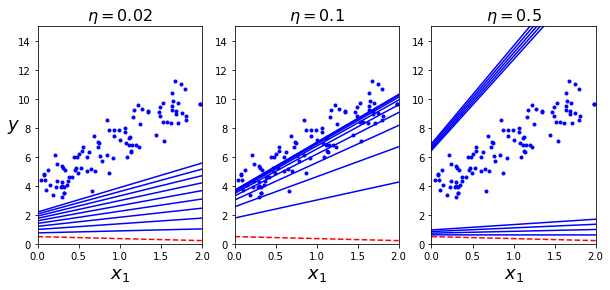

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(42)
theta = np.random.randn(2,1)  # 무작위 초기화

plt.figure(figsize=(10,4))    # 도표 크기 지정

# eta=0.02
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)

# eta=0.1
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)

# eta=0.5
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

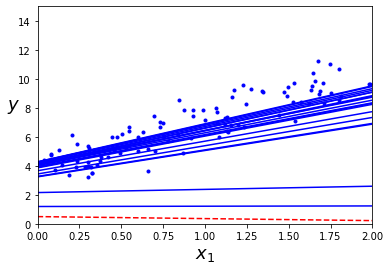

In [20]:
theta_path_sgd = []

m = len(X_b)
np.random.seed(42)


n_epochs = 50   # 에포크 수
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)    # 파라미터 랜덤 초기화

for epoch in range(n_epochs):
    
    # 매 샘플에 대해 그레이디언트 계산 후 파라미터 업데이트
    for i in range(m):
        
        # 처음 20번 선형 모델(직선) 그리기
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
            
        # 파라미터 업데이트
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # 하나의 샘플에 대한 그레이디언트 계산
        eta = learning_schedule(epoch * m + i)        # 학습 스케쥴을 이용한 학습률 조정
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                                                         
plt.show()                                           